# Name : riddhi manjrekar  rollno:42
# batch:2
#Expt.-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.

#ols

In [222]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [223]:
x=np.array([1,2,3]).reshape(-1,1)
y=np.array([2,3,5])


In [224]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [225]:
a=np.array([1,2,3])
a

array([1, 2, 3])

In [226]:
a.shape


(3,)

In [227]:
x.shape


(3, 1)

In [228]:
w=model.coef_[0]
b=model.intercept_
print(f"model weights : {w}")
print(f"model bias : {b}")
w,b

model weights : 1.4999999999999993
model bias : 0.3333333333333348


(np.float64(1.4999999999999993), np.float64(0.3333333333333348))

In [229]:
y_pred=model.predict(x)
print("\n predictions for training data :")
for xi , yi , ypi in zip(x.flatten(),y,y_pred):
  print(f" x={xi} ,actual sales={yi} ,predicted sales={ypi}")

mse = mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"mean squared error={mse}")
print(f"r2 score={r2}")


 predictions for training data :
 x=1 ,actual sales=2 ,predicted sales=1.8333333333333341
 x=2 ,actual sales=3 ,predicted sales=3.3333333333333335
 x=3 ,actual sales=5 ,predicted sales=4.833333333333333
mean squared error=0.05555555555555553
r2 score=0.9642857142857143


In [230]:
xr=np.array([10,20,30,50]).reshape(-1,1)
yr=np.array([12,21,29,48])
model2=LinearRegression()
model2.fit(xr,yr)

LinearRegression()

In [231]:
w2=model2.coef_[0]
b2=model2.coef_[0]
print(f"model weights : {w2}")
print(f"model bias : {b2}")


model weights : 0.8971428571428574
model bias : 0.8971428571428574


In [232]:
model2.predict(xr)

array([11.8       , 20.77142857, 29.74285714, 47.68571429])

In [233]:
yrp=model2.predict(xr)
yrp

array([11.8       , 20.77142857, 29.74285714, 47.68571429])

#MLE

In [234]:
from scipy.optimize import minimize

In [235]:
def nef_log_likelihood(params):
  w,b=params
  sigma2=1
  y_pred=w*x+b
  nll = 0.5 * np.sum((y - y_pred) ** 2 / sigma2 + np.log(sigma2))
  return nll

In [236]:
initial_guess=[0,0]
result=minimize(nef_log_likelihood,initial_guess)
w_mle,b_mle=result.x


In [237]:
print(f"MLE w = {w_mle}")
print(f"MLE b = {b_mle}")

MLE w = -8.3681841778443e-08
MLE b = 3.3333335569014952


In [238]:
y_pred =w_mle * x + b_mle

In [239]:
print("\nPredictions for training data:")
for xi, yi, ypi in zip(x,y,y_pred):
  print(f" x={xi} ,actual sales={yi} ,predicted sales={ypi}")

mse = mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"mean squared error={mse}")
print(f"r2 score={r2}")


Predictions for training data:
 x=[1] ,actual sales=2 ,predicted sales=[3.33333347]
 x=[2] ,actual sales=3 ,predicted sales=[3.33333339]
 x=[3] ,actual sales=5 ,predicted sales=[3.33333331]
mean squared error=1.555555722919247
r2 score=-1.0759094459800167e-07


# Gradient Descent

In [240]:
w,b =0,0

In [241]:
alpha = 0.0001
n_iter = 1000
n= len(x)

for i in range(n_iter):
    y_pred = w*x.flatten()+b
    dw=-(2/n)*np.sum(x.flatten()*(y-y_pred))
    db=-(2/n)*np.sum(y-y_pred)
    w= w-alpha*dw
    b= b-alpha*db

print(f"slope : {w} , bais: {b}")
print(f"Intercept {b}:",b)




slope : 0.9277932204091286 , bais: 0.4003820339618283
Intercept 0.4003820339618283: 0.4003820339618283


In [242]:
y_pred = w*x+b
print("\n predictions for training data :")
for xi , yi , ypi in zip(x.flatten(),y,y_pred):
  print(f" x={xi} ,actual sales={yi} ,predicted sales={ypi}")

mse = mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)
print(f"mean squared error={mse}")
print(f"r2 score={r2}")


 predictions for training data :
 x=1 ,actual sales=2 ,predicted sales=[1.32817525]
 x=2 ,actual sales=3 ,predicted sales=[2.25596847]
 x=3 ,actual sales=5 ,predicted sales=[3.1837617]
mean squared error=1.4345509930741855
r2 score=0.07778864730945201


In [243]:
import numpy as np
import matplotlib.pyplot as plt

def loss(w1):
  w0=np.mean(y) - w1*np.mean(x)
  y_pred=w0+w1*x
  mse=np.mean((y-y_pred)**2)
  return mse
def gradient(w1):
  w0=np.mean(y) - w1*np.mean(x)
  y_pred=w0+w1*x
  dw1=-2*np.sum((y - y_pred)*x) #/len(x)
  return dw1

ir=0.1
wl = 4
iteration = 15
wl_values = []
loss_values = []

for i in range(iteration):
  wl_values.append(wl)
  loss_values.append(loss(wl))
  grad = gradient(wl)
  wl = wl - ir*grad

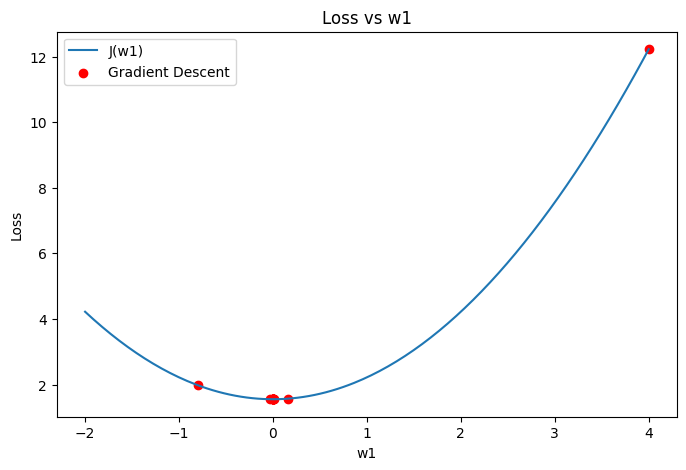

In [244]:
w_space = np.linspace(-2,4,200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(8,5))
plt.plot(w_space,loss_space, label="J(w1)")
plt.scatter(wl_values,loss_values,color="red",label="Gradient Descent")
plt.legend()
plt.xlabel("w1")
plt.ylabel("Loss")
plt.title("Loss vs w1")
plt.show()

#